In [84]:
from datagenerator import jet_data_generator 
import matplotlib as mpl
import time, h5py,os
import numpy as np

store_folder = 'jet-data'
store_folder=os.path.join(os.getcwd(),store_folder)
plot_folder='figures/jet-data/test-generator/'
plot_folder=os.path.join(os.getcwd(),plot_folder)
if not os.path.exists(plot_folder):
    os.makedirs(plot_folder, exist_ok=True)
if not os.path.exists(store_folder):
    os.makedirs(plot_folder, exist_ok=True)

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (6,6)
plt.rcParams.update({'font.size': 18})

In [66]:
quarkmass=100
quarkp = 400
massprior="background"
nprong=2
nparticle=64
doFixP=True

sample_gen = jet_data_generator(massprior=massprior,
                            quarkmass=quarkmass, 
                            quarkp=quarkp,
                            nprong=nprong, 
                            nparticle=nparticle, 
                            doFixP=doFixP) # initial particle momentum fixed at 400 (can be changed)



In [67]:
sample_name = 'mass%s_P%s_nprong%i_npart%i_%s'%(
    str(quarkmass), str(quarkp), nprong, nparticle, massprior
)
if doFixP:
    sample_name +='FixP'

In [ ]:
start = time.time()
sample = sample_gen.generate_dataset(10000)
end = time.time()
print(end-start)

In [ ]:
f = h5py.File('%s/%s.h5'%(store_folder, sample_name), 'w')
f.create_dataset('data', data=sample, compression='gzip')
f.close()

In [ ]:
sample.shape

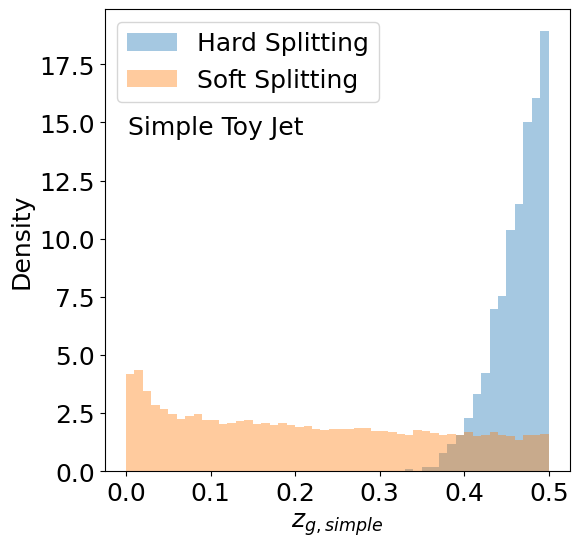

In [10]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.hist(sample_gen.zhard,alpha=0.4,bins=np.linspace(0,0.5,51),density=True,label="Hard Splitting")
ax.hist(sample_gen.zsoft,alpha=0.4,bins=np.linspace(0,0.5,51),density=True,label="Soft Splitting")
ax.legend()
ax.set_xlabel(r'$z_{g, simple}$')
ax.set_ylabel('Density')
ax.text(0.05, 0.73, 'Simple Toy Jet', transform=ax.transAxes)
fig.savefig(folder+'%s.png'%(sample_name))

# plot events

In [79]:
def plot_event(pfcands, name, folder='./'):
    pt = pfcands[:,0]
    eta = pfcands[:,1]
    phi = pfcands[:,2]
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.scatter(eta,phi,s=pt*10, alpha=0.2)
    ax.set_xlabel('eta')
    ax.set_ylabel('phi')
    ax.set_xlim([-4,4])
    ax.set_ylim([-3.15,3.15])
    fig.savefig(f'%s/%s_scatter.png'%(folder, name))

def plot_event_binned(pfcands, name, folder='./'):
    pt = pfcands[:,0]
    eta = pfcands[:,1]
    phi = pfcands[:,2]
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    h=ax.hist2d(eta,phi,weights=pt,norm=mpl.colors.LogNorm(), bins=[np.linspace(-4, 4, 65), np.linspace(-3.15, 3.15, 65)])
    ax.set_xlabel('eta')
    ax.set_ylabel('phi')
    fig.savefig(f'%s/%s_hist2d.png'%(folder, name))
    return h

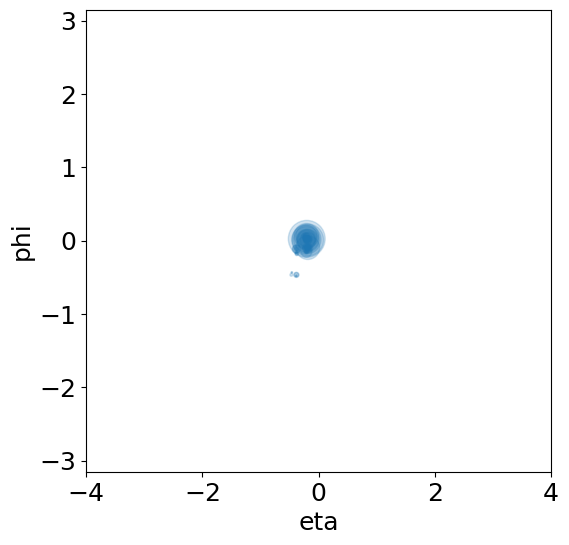

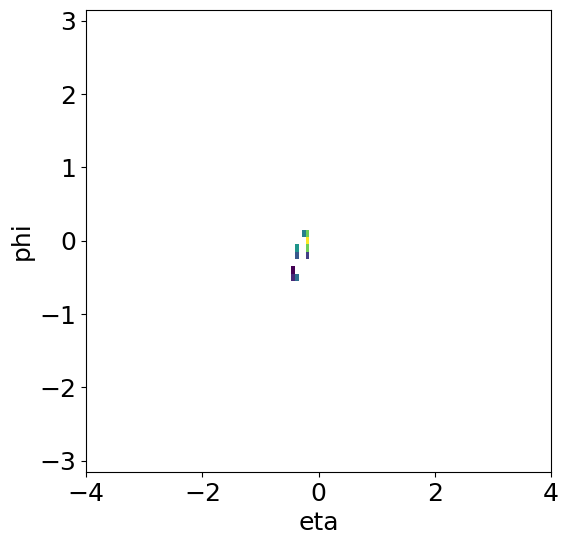

In [64]:
event_idx=0
plot_event(sample[event_idx].reshape(-1,3), name=sample_name+'_'+event_idx, folder=plot_folder)
plot_event_binned(sample[event_idx].reshape(-1,3), name=sample_name+'_'+event_idx, folder=plot_folder)

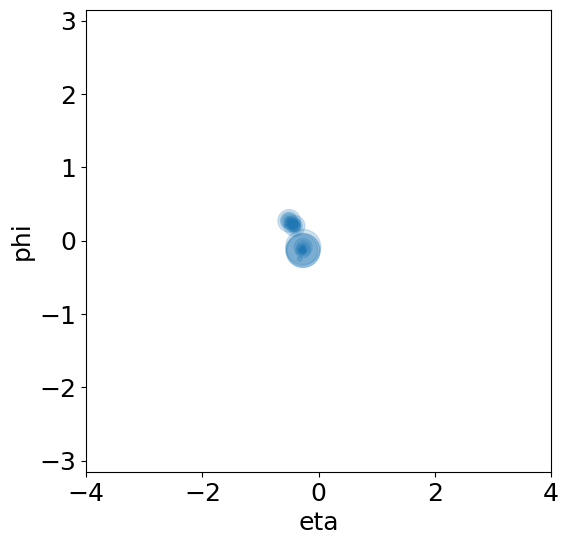

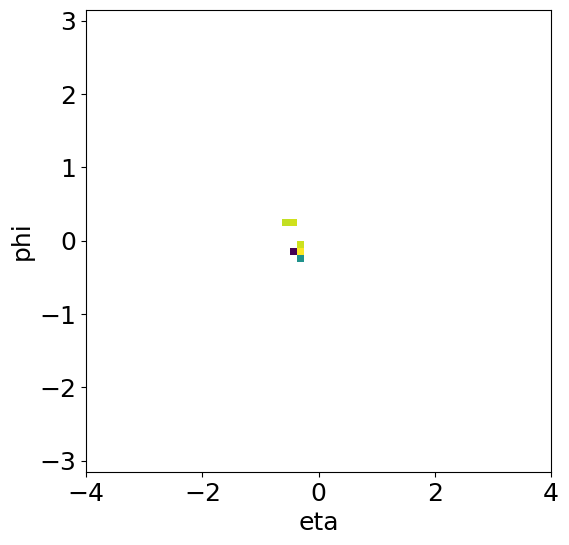

In [80]:
plot_event(sample[event_idx].reshape(-1,3), name=sample_name+'_'+event_idx, folder=plot_folder)
plot_event_binned(sample[event_idx].reshape(-1,3), name=sample_name+'_'+event_idx, folder=plot_folder)

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.hist(sample.reshape(-1, 3)[:, 0],alpha=0.4,bins=20,density=True,)
ax.set_xlabel(r'$p_T$')
ax.set_ylabel('Density')
plt.yscale('log')
fig.savefig(plot_folder+'/%s_pT.pdf'%(sample_name))

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.hist(sample.reshape(-1, 3)[:, 1],alpha=0.4,bins=20,density=True)
ax.set_xlabel(r'$\eta$')
ax.set_ylabel('Density')
plt.yscale('log')
fig.savefig(plot_folder+'/%s_eta.pdf'%(sample_name))

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.hist(sample.reshape(-1, 3)[:, 2],alpha=0.4,bins=20,density=True)
ax.set_xlabel(r'$\phi$')
ax.set_ylabel('Density')
plt.yscale('log')
fig.savefig(plot_folder+'/%s_phi.pdf'%(sample_name))